In [2]:
import csv
import collections
import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn.metrics as metrics

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model, save_model
from tensorflow.keras.layers import Activation, Dense, Input, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, Precision, Recall, F1Score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import uniform, randint

In [3]:
# leitura dos registros de treinamento
csv_path_training_gases = "C:/Users/melis/OneDrive/IC/IC-ML-Codes-3/.venv/separated_data/separated_data/taha_train_samples.csv"
with open(csv_path_training_gases, mode = 'r') as file:
    csv_reader_training_gases = csv.reader(file)
    next(csv_reader_training_gases)

    train_samples = []
    for row in csv_reader_training_gases:
        train_samples.append(row)
        
csv_path_training_faults = "C:/Users/melis/OneDrive/IC/IC-ML-Codes-3/.venv/separated_data/separated_data/taha_train_labels.csv"
with open(csv_path_training_faults, mode = 'r') as file:
    csv_reader_training_faults = csv.reader(file)
    next(csv_reader_training_faults)

    train_labels = []
    for row in csv_reader_training_faults:
        train_labels.append(row)

In [4]:
# normalização dos gases
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples)
scaled_train_samples = np.array(scaled_train_samples)

# normalização das falhas
train_labels = train_labels.flatten()
int_scaled_train_labels = (train_labels.astype(float)-1).astype(int)
int_scaled_train_labels = np.array(int_scaled_train_labels)

In [5]:
# estrutura da rede neural
def create_functional_model():
    inputs = Input(shape=(5,))
    x = Dense(26, activation='relu')(inputs)
    x = Dense(13, activation='relu')(inputs)
    #x = Dense(10, activation='relu')(inputs)
    outputs = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

functional_model = create_functional_model()
history = functional_model.fit(scaled_train_samples, int_scaled_train_labels, epochs=10000, batch_size=25, verbose=2)

Epoch 1/10000
15/15 - 1s - 70ms/step - accuracy: 0.1558 - loss: 1.7949
Epoch 2/10000
15/15 - 0s - 3ms/step - accuracy: 0.2153 - loss: 1.7719
Epoch 3/10000
15/15 - 0s - 3ms/step - accuracy: 0.2748 - loss: 1.7565
Epoch 4/10000
15/15 - 0s - 4ms/step - accuracy: 0.2550 - loss: 1.7399
Epoch 5/10000
15/15 - 0s - 6ms/step - accuracy: 0.2720 - loss: 1.7232
Epoch 6/10000
15/15 - 0s - 4ms/step - accuracy: 0.2748 - loss: 1.7118
Epoch 7/10000
15/15 - 0s - 3ms/step - accuracy: 0.2663 - loss: 1.6950
Epoch 8/10000
15/15 - 0s - 3ms/step - accuracy: 0.2691 - loss: 1.6871
Epoch 9/10000
15/15 - 0s - 3ms/step - accuracy: 0.2776 - loss: 1.6757
Epoch 10/10000
15/15 - 0s - 3ms/step - accuracy: 0.2776 - loss: 1.6669
Epoch 11/10000
15/15 - 0s - 3ms/step - accuracy: 0.2861 - loss: 1.6598
Epoch 12/10000
15/15 - 0s - 3ms/step - accuracy: 0.2833 - loss: 1.6500
Epoch 13/10000
15/15 - 0s - 3ms/step - accuracy: 0.2861 - loss: 1.6465
Epoch 14/10000
15/15 - 0s - 3ms/step - accuracy: 0.2890 - loss: 1.6383
Epoch 15/10000

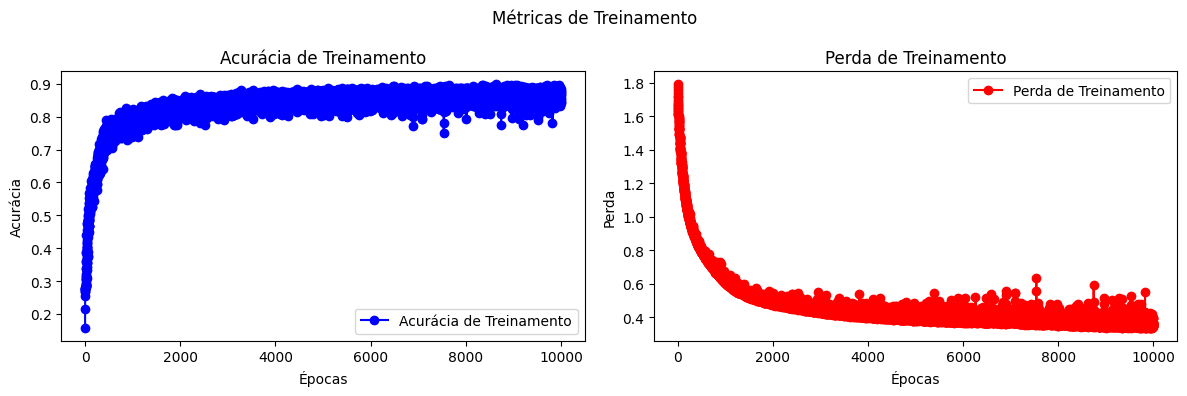

In [6]:
# plotagem das métricas de treinamento
def plot_training_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Métricas de Treinamento')

    ax1.plot(epochs, acc, 'bo-', label='Acurácia de Treinamento')
    ax1.set_title('Acurácia de Treinamento')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Acurácia')
    ax1.legend()

    ax2.plot(epochs, loss, 'ro-', label='Perda de Treinamento')
    ax2.set_title('Perda de Treinamento')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Perda')
    ax2.legend()

    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']
        ax1.plot(epochs, val_acc, 'g-', label='Acurácia de Validação')
        ax2.plot(epochs, val_loss, 'm-', label='Perda de Validação')
        ax1.legend()
        ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Acurácia no conjunto de teste: 0.4788
Perda no conjunto de teste: 23.6242

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.35      0.60      0.44        30
           1       0.33      0.57      0.42        28
           2       0.33      0.27      0.30        67
           3       0.79      0.66      0.72        47
           4       0.52      0.72      0.60        18
           5       0.94      0.37      0.53        46

    accuracy                           0.48       236
   macro avg       0.55      0.53      0.50       236
weighted avg       0.56      0.48      0.48       236



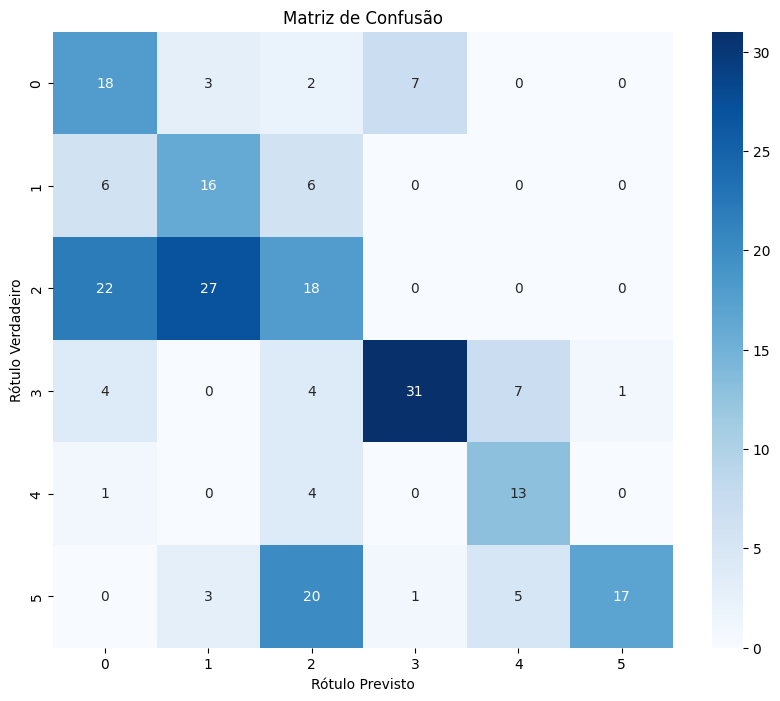

In [7]:
# leitura dos registros de teste
csv_path_testing_gases = "C:/Users/melis/OneDrive/IC/IC-ML-Codes-3/.venv/separated_data/separated_data/taha_test_samples.csv"
with open(csv_path_testing_gases, mode = 'r') as file:
    csv_reader_testing_gases = csv.reader(file)
    next(csv_reader_testing_gases)
    
    test_samples = []
    for row in csv_reader_testing_gases:
        test_samples.append(row)

csv_path_testing_faults = "C:/Users/melis/OneDrive/IC/IC-ML-Codes-3/.venv/separated_data/separated_data/taha_test_labels.csv"
with open(csv_path_testing_faults, mode = 'r') as file:
    csv_reader_testing_faults = csv.reader(file)
    next(csv_reader_testing_faults)
    
    test_labels = []
    for row in csv_reader_testing_faults:
        test_labels.append(row)

# normalização dos gases de teste
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples)
scaled_test_samples = np.array(scaled_test_samples)

# normalização das falhas de teste
test_labels = test_labels.flatten()
int_scaled_test_labels = (test_labels.astype(float)-1).astype(int)
int_scaled_test_labels = np.array(int_scaled_test_labels)

'''
# Criar e treinar o modelo
functional_model = create_functional_model()
history = functional_model.fit(scaled_train_samples, 
                             int_scaled_train_labels, 
                             epochs=3000, 
                             batch_size=25, 
                             verbose=2)
'''

# realizando predições com o modelo treinado
y_pred = functional_model.predict(scaled_test_samples)
y_pred_classes = np.argmax(y_pred, axis=1)

# avaliando o modelo
test_loss, test_accuracy = functional_model.evaluate(scaled_test_samples, 
                                                   int_scaled_test_labels, 
                                                   verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(int_scaled_test_labels, y_pred_classes))

# matriz de confusão
cm = confusion_matrix(int_scaled_test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()
